In [1]:
import pickle
import random
import pandas as pd 
import time
from scipy import sparse
import numpy as np
from past.builtins import xrange
pd.set_option('display.max_columns', 100)
from kmodes.kmodes import KModes
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.preprocessing import MinMaxScaler
import implicit
import ml_metrics as metrics
import recmetrics as rec
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import average_precision_score

In [2]:
df = pd.read_csv('clustering.csv', index_col =0 )
df1 = df.copy()
df1 = df.drop('Client_Id',1)

# Run the KModes Algorithm

In [ ]:
km_huang = KModes(n_clusters=6, init = "Huang", n_init = 1)
fitClusters_huang = km_huang.fit_predict(df1)
fitClusters_huang

# Modify dataframe to include cluster membership

In [3]:
# load clusters from saved file and save to column
clusters_fit = pickle.load(open( "clusters.p", "rb" ))
df['group'] = clusters_fit

# re-load data and drop user features
data = pd.read_csv('PAYX_dataset_2019Fall.csv')
data = data.drop('Rep.Level',1)
data= data.drop('Size',1)
data = data.drop('Industry',1)

# re-index the data
data = data.reindex(sorted(data.columns), axis=1)
client_id = data['Client_Id']
data.drop(labels=['Client_Id'], axis=1,inplace = True)
data.insert(0, 'Client_Id', client_id)

# merge the two dataframes
new_df = pd.merge(data, df, on='Client_Id')

# reorder the columns
new_df = new_df.drop(new_df.columns[41:64],1)
new_df= new_df[['Client_Id','group', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B1',
       'B2', 'B3', 'B4', 'B5', 'B6', 'C1', 'C2', 'C3', 'C5', 'C6', 'C7', 'D1',
       'D2', 'D3', 'D4', 'E1', 'E10', 'E11', 'E12', 'E13', 'E2', 'E3', 'E4',
       'E5', 'E6', 'E7', 'E8', 'E9', 'F1', 'F2']]

# Subset the data by group membership

In [4]:
group1 = new_df.loc[new_df['group']==0]
group2 = new_df.loc[new_df['group']==1]
group3 = new_df.loc[new_df['group']==2]
group4 = new_df.loc[new_df['group']==3]
group5 = new_df.loc[new_df['group']==4]
group6 = new_df.loc[new_df['group']==5]

In [5]:
print("Cluster 1 has {} clients".format(len(group1)))
print("Cluster 2 has {} clients".format(len(group2)))
print("Cluster 3 has {} clients".format(len(group3)))
print("Cluster 4 has {} clients".format(len(group4)))
print("Cluster 5 has {} clients".format(len(group5)))
print("Cluster 6 has {} clients".format(len(group6)))

Cluster 1 has 127193 clients
Cluster 2 has 49057 clients
Cluster 3 has 46505 clients
Cluster 4 has 72702 clients
Cluster 5 has 30945 clients
Cluster 6 has 56123 clients


# Make dataframe for each cluster

In [53]:
# create a new copy of the dataframe to store high-level product categories
df_high = group1.copy()

df_high['A'] = group1[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']].sum(axis=1)
df_high['B'] = group1[['B1', 'B2', 'B3', 'B4', 'B5', 'B6']].sum(axis=1)
df_high['C'] = group1[['C1', 'C2', 'C3', 'C5', 'C6', 'C7']].sum(axis=1)
df_high['D'] = group1[['D1', 'D2', 'D3', 'D4']].sum(axis=1)
df_high['E'] = group1[['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13']].sum(axis=1)
df_high['F'] = group1[['F1', 'F2']].sum(axis=1)

# drop all sub-level product categories from the copy
df_high.drop(columns=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
                      'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'C1', 'C2', 'C3',
                      'C5', 'C6', 'C7', 'D1', 'D2', 'D3', 'D4','E1', 'E2',
                      'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12',
                      'E13', 'F1', 'F2'], inplace=True)

In [73]:
# create a new copy of the dataframe to store high-level product categories
df_high = group2.copy()

df_high['A'] = group2[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']].sum(axis=1)
df_high['B'] = group2[['B1', 'B2', 'B3', 'B4', 'B5', 'B6']].sum(axis=1)
df_high['C'] = group2[['C1', 'C2', 'C3', 'C5', 'C6', 'C7']].sum(axis=1)
df_high['D'] = group2[['D1', 'D2', 'D3', 'D4']].sum(axis=1)
df_high['E'] = group2[['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13']].sum(axis=1)
df_high['F'] = group2[['F1', 'F2']].sum(axis=1)

# drop all sub-level product categories from the copy
df_high.drop(columns=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
                      'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'C1', 'C2', 'C3',
                      'C5', 'C6', 'C7', 'D1', 'D2', 'D3', 'D4','E1', 'E2',
                      'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12',
                      'E13', 'F1', 'F2'], inplace=True)

In [93]:
# create a new copy of the dataframe to store high-level product categories
df_high = group3.copy()

df_high['A'] = group3[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']].sum(axis=1)
df_high['B'] = group3[['B1', 'B2', 'B3', 'B4', 'B5', 'B6']].sum(axis=1)
df_high['C'] = group3[['C1', 'C2', 'C3', 'C5', 'C6', 'C7']].sum(axis=1)
df_high['D'] = group3[['D1', 'D2', 'D3', 'D4']].sum(axis=1)
df_high['E'] = group3[['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13']].sum(axis=1)
df_high['F'] = group3[['F1', 'F2']].sum(axis=1)

# drop all sub-level product categories from the copy
df_high.drop(columns=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
                      'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'C1', 'C2', 'C3',
                      'C5', 'C6', 'C7', 'D1', 'D2', 'D3', 'D4','E1', 'E2',
                      'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12',
                      'E13', 'F1', 'F2'], inplace=True)

In [113]:
# create a new copy of the dataframe to store high-level product categories
df_high = group4.copy()

df_high['A'] = group4[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']].sum(axis=1)
df_high['B'] = group4[['B1', 'B2', 'B3', 'B4', 'B5', 'B6']].sum(axis=1)
df_high['C'] = group4[['C1', 'C2', 'C3', 'C5', 'C6', 'C7']].sum(axis=1)
df_high['D'] = group4[['D1', 'D2', 'D3', 'D4']].sum(axis=1)
df_high['E'] = group4[['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13']].sum(axis=1)
df_high['F'] = group4[['F1', 'F2']].sum(axis=1)

# drop all sub-level product categories from the copy
df_high.drop(columns=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
                      'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'C1', 'C2', 'C3',
                      'C5', 'C6', 'C7', 'D1', 'D2', 'D3', 'D4','E1', 'E2',
                      'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12',
                      'E13', 'F1', 'F2'], inplace=True)

In [133]:
# create a new copy of the dataframe to store high-level product categories
df_high = group5.copy()

df_high['A'] = group5[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']].sum(axis=1)
df_high['B'] = group5[['B1', 'B2', 'B3', 'B4', 'B5', 'B6']].sum(axis=1)
df_high['C'] = group5[['C1', 'C2', 'C3', 'C5', 'C6', 'C7']].sum(axis=1)
df_high['D'] = group5[['D1', 'D2', 'D3', 'D4']].sum(axis=1)
df_high['E'] = group5[['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13']].sum(axis=1)
df_high['F'] = group5[['F1', 'F2']].sum(axis=1)

# drop all sub-level product categories from the copy
df_high.drop(columns=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
                      'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'C1', 'C2', 'C3',
                      'C5', 'C6', 'C7', 'D1', 'D2', 'D3', 'D4','E1', 'E2',
                      'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12',
                      'E13', 'F1', 'F2'], inplace=True)

In [153]:
# create a new copy of the dataframe to store high-level product categories
df_high = group6.copy()

df_high['A'] = group6[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']].sum(axis=1)
df_high['B'] = group6[['B1', 'B2', 'B3', 'B4', 'B5', 'B6']].sum(axis=1)
df_high['C'] = group6[['C1', 'C2', 'C3', 'C5', 'C6', 'C7']].sum(axis=1)
df_high['D'] = group6[['D1', 'D2', 'D3', 'D4']].sum(axis=1)
df_high['E'] = group6[['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13']].sum(axis=1)
df_high['F'] = group6[['F1', 'F2']].sum(axis=1)

# drop all sub-level product categories from the copy
df_high.drop(columns=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
                      'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'C1', 'C2', 'C3',
                      'C5', 'C6', 'C7', 'D1', 'D2', 'D3', 'D4','E1', 'E2',
                      'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12',
                      'E13', 'F1', 'F2'], inplace=True)

In [154]:
product_category = []
ID_2 = []
quantity = []

ID = list(df_high['Client_Id'])
A = list(df_high['A'])
B = list(df_high['B'])
C = list(df_high['C'])
D = list(df_high['D'])
E = list(df_high['E'])
F = list(df_high['F'])

for i in range(len(ID)):
    if A[i] != 0:
        product_category.append('A')
        quantity.append(A[i])
        ID_2.append(ID[i])
    if B[i] != 0:
        product_category.append('B')
        quantity.append(B[i])
        ID_2.append(ID[i])
    if C[i] != 0:
        product_category.append('C')
        quantity.append(C[i])
        ID_2.append(ID[i])
    if D[i] != 0:
        product_category.append('D')
        quantity.append(D[i])
        ID_2.append(ID[i])
    if E[i] != 0:
        product_category.append('E')
        quantity.append(E[i])
        ID_2.append(ID[i])
    if F[i] != 0:
        product_category.append('F')
        quantity.append(F[i])
        ID_2.append(ID[i])
        
df_items = pd.DataFrame()
df_items['Client_Id'] = ID_2
df_items['Category'] = product_category
df_items['Quantity'] = quantity

# Generate the sparse matrix

In [155]:
df_items['Client_Id'] = df_items.Client_Id.astype(int) # Convert to int for customer ID
df_items = df_items.groupby(['Client_Id', 'Category']).sum().reset_index() # Group together
customers = list(np.sort(df_items.Client_Id.unique())) # Get our unique customers
products = list(df_items.Category.unique()) # Get our unique products that were purchased
quantity = list(df_items.Quantity) # All of our purchases
rows = df_items.Client_Id.astype('category').cat.codes 
# Get the associated row indices
cols = df_items.Category.astype('category').cat.codes 
# Get the associated column indices
purchases_sparse = sparse.csr_matrix((quantity, (rows, cols)), shape=(len(customers), len(products)))
matrix_size = purchases_sparse.shape[0]*purchases_sparse.shape[1] # Number of possible interactions in the matrix
num_purchases = len(purchases_sparse.nonzero()[0]) # Number of items interacted with
sparsity = 100*(1 - (num_purchases/matrix_size))
sparsity

68.43105041585378

# Make the train set

In [156]:
def make_train(ratings, pct_test):
    '''
    This function will take in the original user-item matrix and "mask" a percentage of the original ratings where a
    user-item interaction has taken place for use as a test set. The test set will contain all of the original ratings, 
    while the training set replaces the specified percentage of them with a zero in the original ratings matrix. 
    
    parameters: 
    
    ratings - the original ratings matrix from which you want to generate a train/test set. Test is just a complete
    copy of the original set. This is in the form of a sparse csr_matrix. 
    
    pct_test - The percentage of user-item interactions where an interaction took place that you want to mask in the 
    training set for later comparison to the test set, which contains all of the original ratings. 
    
    returns:
    
    training_set - The altered version of the original data with a certain percentage of the user-item pairs 
    that originally had interaction set back to zero.
    
    test_set - A copy of the original ratings matrix, unaltered, so it can be used to see how the rank order 
    compares with the actual interactions.
    
    user_inds - From the randomly selected user-item indices, which user rows were altered in the training data.
    This will be necessary later when evaluating the performance via AUC.
    '''
    test_set = ratings.copy() # Make a copy of the original set to be the test set. 
    test_set[test_set != 0] = 1 # Store the test set as a binary preference matrix
    training_set = ratings.copy() # Make a copy of the original data we can alter as our training set. 
    nonzero_inds = training_set.nonzero() # Find the indices in the ratings data where an interaction exists
    nonzero_pairs = list(zip(nonzero_inds[0], nonzero_inds[1])) # Zip these pairs together of user,item index into list
    random.seed(0) # Set the random seed to zero for reproducibility
    num_samples = int(np.ceil(pct_test*len(nonzero_pairs))) # Round the number of samples needed to the nearest integer
    samples = random.sample(nonzero_pairs, num_samples) # Sample a random number of user-item pairs without replacement
    user_inds = [index[0] for index in samples] # Get the user row indices
    item_inds = [index[1] for index in samples] # Get the item column indices
    training_set[user_inds, item_inds] = 0 # Assign all of the randomly chosen user-item pairs to zero
    training_set.eliminate_zeros() # Get rid of zeros in sparse array storage after update to save space
    return training_set, test_set, list(set(user_inds)) # Output the unique list of user rows that were altered 

In [157]:
product_train, product_test, product_users_altered = make_train(purchases_sparse, pct_test = 0.2)
product_users_altered.sort()

# Run ALS on train set

In [158]:
alpha = 15
item_user_data = (product_train*alpha).astype('double')
model = implicit.als.AlternatingLeastSquares(factors=20, regularization = 0.1, iterations = 50)
model.fit(item_user_data.T)
user_vecs = model.user_factors
item_vecs = model.item_factors
customers_arr = np.array(customers) # Array of customer IDs from the ratings matrix
products_arr = np.array(products) # Array of product IDs from the ratings matrix

# Create an item lookup table

In [159]:
products_arr[0] = 'A'
products_arr[1] = 'B'
products_arr[2] = 'C'
products_arr[3] = 'D'
products_arr[4] = 'E'
products_arr[5] = 'F'

item_lookup = df_items[['Category']].drop_duplicates() # Only get unique item/description pairs
item_lookup['Category'] = item_lookup.Category.astype(str) # Encode as strings for future lookup ease
item_lookup

,Category
0,A
2,B
3,F
5,E
13,D
61,C


In [160]:
item_lookup= item_lookup.reindex([0,2,61,13,5,3])
item_lookup = item_lookup.reset_index(drop=True)
item_lookup

,Category
0,A
1,B
2,C
3,D
4,E
5,F


In [161]:
item_lookup['indexx'] = item_lookup.index
item_lookup = item_lookup[['indexx','Category']]
item_lookup

,indexx,Category
0,0,A
1,1,B
2,2,C
3,3,D
4,4,E
5,5,F


# Make function to get items purchased

In [162]:
def get_items_purchased(customer_id, mf_train, customers_list, products_list, item_lookup):
    '''
    This just tells me which items have been already purchased by a specific user in the training set. 
    
    parameters: 
    
    customer_id - Input the customer's id number that you want to see prior purchases of at least once
    
    mf_train - The initial ratings training set used (without weights applied)
    
    customers_list - The array of customers used in the ratings matrix
    
    products_list - The array of products used in the ratings matrix
    
    item_lookup - A simple pandas dataframe of the unique product ID/product descriptions available
    
    returns:
    
    A list of item IDs and item descriptions for a particular customer that were already purchased in the training set
    '''
    cust_ind = np.where(customers_list == customer_id)[0][0] # Returns the index row of our customer id
    purchased_ind = mf_train[cust_ind,:].nonzero()[1] # Get column indices of purchased items
    prod_codes = products_list[purchased_ind] # Get the stock codes for our purchased items
    return item_lookup.loc[item_lookup.Category.isin(prod_codes)]

### Let's take a look at our altered customers

In [103]:
# this tells us which user rows were altered in the training data
altered_rows = product_users_altered[0:20]
print(altered_rows)

# now get the customer ID using the user row
print("Customer ID # {} was altered".format(customers[9]))

[3, 9, 13, 16, 19, 26, 28, 39, 40, 41, 46, 50, 56, 65, 66, 67, 69, 70, 73, 80]
Customer ID # 152 was altered


### What does the training data look like for this customer

In [104]:
get_items_purchased(152, product_train, customers_arr, products_arr, item_lookup)

,indexx,Category


### Now we can compare with the original data

In [105]:
df_items.loc[df_items['Client_Id'] == 152]

,Client_Id,Category,Quantity
9,152,F,1


# Make function to get recomendations

In [163]:
def rec_items(customer_id, mf_train, user_vecs, item_vecs, customer_list, item_list, item_lookup, num_items):
    '''
    This function will return the top recommended items to our users 
    
    parameters:
    
    customer_id - Input the customer's id number that you want to get recommendations for
    
    mf_train - The training matrix you used for matrix factorization fitting
    
    user_vecs - the user vectors from your fitted matrix factorization
    
    item_vecs - the item vectors from your fitted matrix factorization
    
    customer_list - an array of the customer's ID numbers that make up the rows of your ratings matrix 
                    (in order of matrix)
    
    item_list - an array of the products that make up the columns of your ratings matrix
                    (in order of matrix)
    
    item_lookup - A simple pandas dataframe of the unique product ID/product descriptions available
    
    num_items - The number of items you want to recommend in order of best recommendations. Default is 10. 
    
    returns:
    
    - The top n recommendations chosen based on the user/item vectors for items never interacted with/purchased
    '''
    
    cust_ind = np.where(customer_list == customer_id)[0][0] # Returns the index row of our customer id
    pref_vec = mf_train[cust_ind,:].toarray() # Get the ratings from the training set ratings matrix
    pref_vec = pref_vec.reshape(-1) + 1 # Add 1 to everything, so that items not purchased yet become equal to 1
    pref_vec[pref_vec > 1] = 0 # Make everything already purchased zero
    rec_vector = user_vecs[cust_ind,:].dot(item_vecs.T) # Get dot product of user vector and all item vectors
    # Scale this recommendation vector between 0 and 1
    min_max = MinMaxScaler()
    rec_vector_scaled = min_max.fit_transform(rec_vector.reshape(-1,1))[:,0] 
    recommend_vector = pref_vec*rec_vector_scaled 
    # Items already purchased have their recommendation multiplied by zero
    product_idx = np.argsort(recommend_vector)[::-1][:num_items] # Sort the indices of the items into order 
    # of best recommendations
    rec_list = [] # start empty list to store items
    for index in product_idx:
        code = item_list[index]
        rec_list.append([code, item_lookup.indexx.loc[item_lookup.Category == code].iloc[0]]) 
        #Append our descriptions to the list
    
    Category = [item[0] for item in rec_list]
    index = [item[1] for item in rec_list]
    final_frame = pd.DataFrame({'Product': Category, 'Index': index}) # Create a dataframe 
    return final_frame[['Index', 'Product']] # Switch order of columns

### Now let's get recommendations for our user!

In [107]:
rec_items(152, product_train, user_vecs, item_vecs, customers_arr, products_arr, item_lookup, num_items=5)

,Index,Product
0,5,F
1,4,E
2,3,D
3,2,C
4,1,B


# Get the original purchases for each altered client

In [164]:
def get_purchases(alt_clients):
    """ This function returns the purchases made by the altered clients.
    
    Args:
        alt_clients:: the list of clients whose purchases were masked in the training data
    Returns:
        a list of lists containing the actual purchases made by the altered clients
    """
    
    original_purchases = []
    for i in alt_clients:
        i = customers[i]
        original_purchases.append(list(df_items.loc[df_items['Client_Id'] == i]['Category']))
        
    return original_purchases

In [165]:
purchases = get_purchases(product_users_altered)

# Get the recommended products for each altered client

In [166]:
def get_recommendations(alt_clients):
    """ This function returns a list of lists of the recommended products for the altered users.
    
    Args:
        alt_clients:: the list of clients whose purchases were masked in the training data
    Returns:
        a list of lists containing the recommendations for each altered user
    """
    

    recommendation_list = []
    for i in alt_clients:
        client = customers[i]
        items = rec_items(client, product_train, user_vecs, item_vecs, customers_arr, products_arr, item_lookup, num_items=5)
        recommendation_list.append(list(items['Product']))
        
        
    return recommendation_list

In [167]:
recs = get_recommendations(product_users_altered)

In [168]:
def encode_recs(alt_clients, purchases, recommendations):
    """ This function creates an encoding for each recommendation made to an altered client,
    where a "1" indicates the recommendation was relevant (product that the client did indeed purchase)
    and "0" if the recommendation was not relevant (product not actually purchased by client).
    
    Args:
        alt_clients:: the list of clients whose purchases were masked in the training data
        purchases:: a list of lists containing purchases made by each altered client
        recommendations:: a list of lists containing the recommendation for each altered client
    Returns:
        a list of lists containing whether or not recommendations were relevant to the clients
    """
    
    indicator_vec = []
    final_indicator_vec=[]
    for i in range(len(alt_clients)): 
        for rec in recommendations[i]: # for each recommendation for the client
            if rec in purchases[i]: # if the client actually purchased that item
                indicator_vec.append(1)
            else:
                indicator_vec.append(0)
    
    for s in range(len(indicator_vec)):
        if s%5 == 0 :
            each_list = list(indicator_vec[s:s+5])
            final_indicator_vec.append(each_list)
        else:
            pass
                
    return final_indicator_vec

In [169]:
rec_vec = encode_recs(product_users_altered, purchases, recs)

# Get mean average precision

In [170]:
def removed(items, original_list, only_duplicates=False, inplace=False):
    """This function by default removes given items from original_list and returns
    a new list. Optionally only removes duplicates of `items` or modifies
    given list in place.
    """
    if not hasattr(items, '_iter_') or isinstance(items, str):
        items = [items]

    if only_duplicates:
        result = []
        for item in original_list:
            if item not in items or item not in result:
                result.append(item)
    else:
        result = [item for item in original_list if item not in items]

    if inplace:
        original_list[:] = result
    else:
        return result

In [171]:
def get_average_precision(encoded_vecs):
    """ This function returns the average precision at k=5.
    
    Args:
        encoded_vecs:: a list of lists containing whether or not recommendations were relevant to the clients
    Returns:
        a list of lists containing the mean average precision at k=5
    """
    precision = []
    for l in range(len(encoded_vecs)):
        lst = encoded_vecs[l]
        for indx, rec in enumerate(lst):
            precision.append(sum(lst[:indx+1])/(indx+1))

    # break up the list per client (5 recommendations per client)       
    final_precision = []
    for i in range(len(precision)):
        if i%5 == 0 :
            p = list(precision[i:i+5])
            final_precision.append(p)
        else:
            pass
        
        
    relevant_precs = []
    for i in final_precision:
        i = removed(0, i) # remove precision of zero from the list
        relevant_precs.append(i)
    
    relevant_precs = np.array(relevant_precs)
    avg_precs = []
    for row in relevant_precs:
        avg_precs.append(np.mean(row))
        
    # convert nans to 0
    avg_precs = np.array(avg_precs)
    avg_precs = np.nan_to_num(avg_precs)
    
    # find the mean average precision
    mean_avg_precs = np.mean(avg_precs)
        
    return mean_avg_precs

In [172]:
maps = round(get_average_precision(rec_vec)*100, 2)
maps

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


42.13

# Make plot of average precision for each cluster

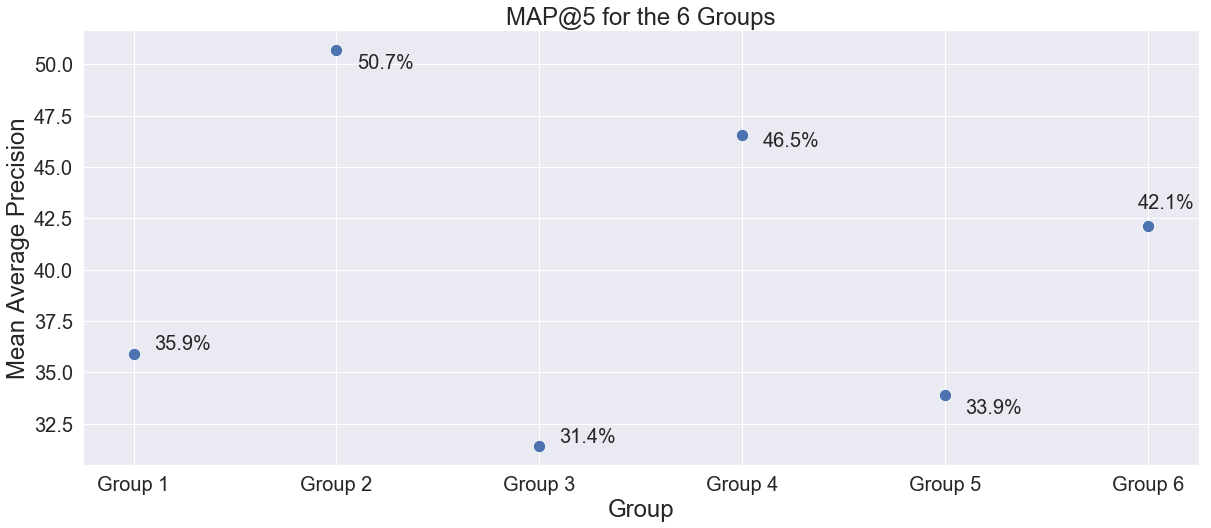

In [274]:
plt.figure(figsize=(20,8))

groups = ["Group 1", "Group 2", "Group 3", "Group 4", "Group 5", "Group 6"]
maps = [35.9, 50.68, 31.43, 46.54, 33.89, 42.13] # mean average precisions

sns.set()
ax = sns.scatterplot(groups, maps, s=150)

plt.ylabel('Mean Average Precision', fontsize= 24)
plt.xlabel('Group', fontsize= 24)
plt.title('MAP@5 for the 6 Groups', fontsize= 24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax.text(0.1, 36.1, "35.9%", transform=ax.transData, fontsize=20)
ax.text(1.1, 49.8, "50.7%", transform=ax.transData, fontsize=20)
ax.text(2.1, 31.6, "31.4%", transform=ax.transData, fontsize=20)
ax.text(3.1, 46, "46.5%", transform=ax.transData, fontsize=20)
ax.text(4.1, 33, "33.9%", transform=ax.transData, fontsize=20)
ax.text(4.95, 43, "42.1%", transform=ax.transData, fontsize=20)


plt.savefig('mean_avg_precision.png')
plt.show()